In [20]:
import os
import pandas as pd
import numpy as np

cleaned_data_path = '../processed_data/cleaned_raw_data.csv'
cleaned_data = pd.read_csv(cleaned_data_path)
cleaned_data


,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,...,DOB,gender,address,Website,job,industry,age,norm_film,matched_title,genres
0,10006052019B0225,emp002,2019-05-06 16:40:43,90000.0,0000000014,20074925,2019-05-06,18:15:00,G04,3,...,1999-04-20,Nữ,Thanh Khê,KH0104|0345,student,computer,19.0,AVENGERS: HOI KET,AVENGERS: HOI KET,"Action,Adventure,Drama,Sci-Fi"
1,10006052019B0225,emp002,2019-05-06 16:40:43,90000.0,0000000014,20074924,2019-05-06,18:15:00,G03,3,...,1999-04-20,Nữ,Thanh Khê,KH0104|0345,student,computer,19.0,AVENGERS: HOI KET,AVENGERS: HOI KET,"Action,Adventure,Drama,Sci-Fi"
2,10022052019B0167,emp011,2019-05-22 20:30:28,90000.0,0000000034,20097042,2019-05-22,20:45:00,E04,2,...,1998-04-18,Nam,Cẩm Lệ,KH0104|0333,student,health service,20.0,JOHN WICK 3: CHUAN BI CHIEN TRANH (C18),JOHN WICK 3: CHUAN BI CHIEN TRANH,"Action,Crime,Thriller"
3,10022052019B0167,emp011,2019-05-22 20:30:28,90000.0,0000000034,20097041,2019-05-22,20:45:00,E03,2,...,1998-04-18,Nam,Cẩm Lệ,KH0104|0333,student,health service,20.0,JOHN WICK 3: CHUAN BI CHIEN TRANH (C18),JOHN WICK 3: CHUAN BI CHIEN TRANH,"Action,Crime,Thriller"
4,10130052019B0141,emp005,2019-05-30 19:28:44,90000.0,0000000034,20106761,2019-05-30,19:30:00,F04,1,...,1998-04-18,Nam,Cẩm Lệ,KH0104|0333,student,health service,20.0,NGOI ĐEN KY QUAI (C18),NGOI DEN KY QUAI,"Comedy,Horror"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35469,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107072,2019-05-30,21:35:00,B10,4,...,1996-09-10,Nữ,Sơn Trà,KHWEBS|00007899,blue collar,finance,22.0,CHUA TE GODZILLA: ĐE VUONG BAT TU (C13),VO BA,Drama
35470,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107071,2019-05-30,21:35:00,B09,4,...,1996-09-10,Nữ,Sơn Trà,KHWEBS|00007899,blue collar,finance,22.0,CHUA TE GODZILLA: ĐE VUONG BAT TU (C13),VO BA,Drama
35471,10130052019B0192,emp005,2019-05-30 21:49:46,180000.0,WEBS00000044909,20107069,2019-05-30,21:35:00,B07,4,...,1996-09-10,Nữ,Sơn Trà,KHWEBS|00007899,blue collar,finance,22.0,CHUA TE GODZILLA: ĐE VUONG BAT TU (C13),VO BA,Drama
35472,12508052019B0036,emp007,2019-05-08 19:26:47,90000.0,WEBS00000046015,20077797,2019-05-08,19:15:00,C14,4,...,2002-04-28,Nữ,Thanh Khê,KHWEBS|00009005,teenager,NaN,16.0,AVENGERS: HOI KET,AVENGERS: HOI KET,"Action,Adventure,Drama,Sci-Fi"


### Drop unnecessary fields for training

In [21]:
new_data = cleaned_data.drop(columns=['orderid', 'cashier','DOB','Website','film','norm_film','saledate', 'matched_title','ticketcode', 'ticket type', 'room'])
# keep only the alphabetic part of the slot (e.g., "G04" → "G")
new_data['slot'] = new_data['slot'].str.replace(r'\d+', '', regex=True)
new_data

,total,customerid,date,time,slot,slot type,ticket price,popcorn,gender,address,job,industry,age,genres
0,90000.0,0000000014,2019-05-06,18:15:00,G,ĐƠN,45000,0,Nữ,Thanh Khê,student,computer,19.0,"Action,Adventure,Drama,Sci-Fi"
1,90000.0,0000000014,2019-05-06,18:15:00,G,ĐƠN,45000,0,Nữ,Thanh Khê,student,computer,19.0,"Action,Adventure,Drama,Sci-Fi"
2,90000.0,0000000034,2019-05-22,20:45:00,E,ĐƠN,45000,0,Nam,Cẩm Lệ,student,health service,20.0,"Action,Crime,Thriller"
3,90000.0,0000000034,2019-05-22,20:45:00,E,ĐƠN,45000,0,Nam,Cẩm Lệ,student,health service,20.0,"Action,Crime,Thriller"
4,90000.0,0000000034,2019-05-30,19:30:00,F,ĐƠN,45000,0,Nam,Cẩm Lệ,student,health service,20.0,"Comedy,Horror"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35469,180000.0,WEBS00000044909,2019-05-30,21:35:00,B,ĐƠN,45000,0,Nữ,Sơn Trà,blue collar,finance,22.0,Drama
35470,180000.0,WEBS00000044909,2019-05-30,21:35:00,B,ĐƠN,45000,0,Nữ,Sơn Trà,blue collar,finance,22.0,Drama
35471,180000.0,WEBS00000044909,2019-05-30,21:35:00,B,ĐƠN,45000,0,Nữ,Sơn Trà,blue collar,finance,22.0,Drama
35472,90000.0,WEBS00000046015,2019-05-08,19:15:00,C,ĐƠN,45000,0,Nữ,Thanh Khê,teenager,NaN,16.0,"Action,Adventure,Drama,Sci-Fi"


Phân phối nhóm tuổi:
age_group
0-18      3945
19-25    17240
26-35     3483
36-50      588
51-65       34
65+          0
Name: count, dtype: int64


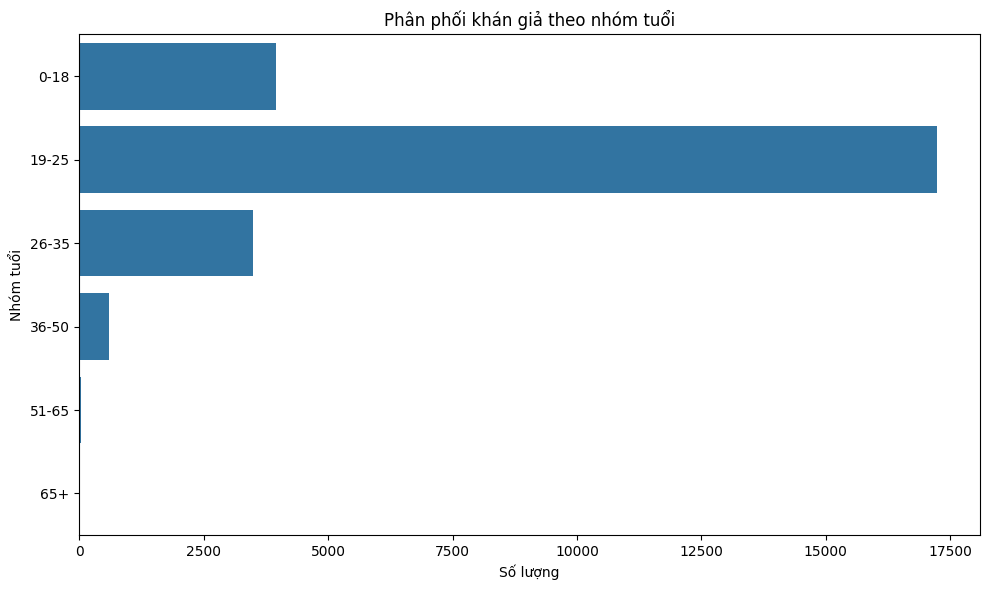

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Chuyển trường age thành categorical bằng cách phân nhóm tuổi

# Định nghĩa các nhóm tuổi
age_bins = [0, 18, 25, 35, 50, 65, 100]
age_labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '65+'] 

# Tạo cột age_group từ age
new_data['age_group'] = pd.cut(new_data['age'], bins=age_bins, labels=age_labels, right=False)
new_data.drop(columns=['age'], inplace=True)

# Kiểm tra phân phối của các nhóm tuổi
age_distribution = new_data['age_group'].value_counts().sort_index()
print("Phân phối nhóm tuổi:")
print(age_distribution)

# Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 6))
sns.countplot(y='age_group', data=new_data, order=age_labels)
plt.title('Phân phối khán giả theo nhóm tuổi')
plt.xlabel('Số lượng')
plt.ylabel('Nhóm tuổi')
plt.tight_layout()
plt.show()

In [23]:
# Convert the 'time' column (e.g., "18:15:00") to datetime and extract the hour
new_data['time'] = pd.to_datetime(new_data['time'], format='%H:%M:%S')
new_data['time_frame'] = pd.cut(new_data['time'].dt.hour, 
                                bins=[0, 6, 12, 19, 22, 24],
                                right=False,
                                labels=['0-6h', '6-12h', '12-19h', '19-22h', '22-24h'])
new_data['time_frame'].head()


0    12-19h
1    12-19h
2    19-22h
3    19-22h
4    19-22h
Name: time_frame, dtype: category
Categories (5, object): ['0-6h' < '6-12h' < '12-19h' < '19-22h' < '22-24h']

### Delete columns with too low standard deviation

In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

new_data['date'] = pd.to_datetime(new_data['date'])

new_data['day_of_week'] = new_data['date'].dt.dayofweek  # 0 = Monday

new_data.drop(columns=['time','date'], inplace=True)

# ----- 3. ONE-HOT ENCODING CÁC CỘT PHÂN LOẠI -----
categorical_cols = ['slot', 'slot type', 'popcorn', 'gender', 'address', 'job', 'industry', 'age_group', 'day_of_week', 'time_frame']
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(new_data[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))


encoded_df

,slot_A,slot_B,slot_C,slot_D,slot_E,slot_F,slot_G,slot_H,slot_I,slot_J,...,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,time_frame_12-19h,time_frame_19-22h,time_frame_22-24h,time_frame_6-12h
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35469,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35470,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35471,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35472,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Delete columns with correlation exceeding threshold

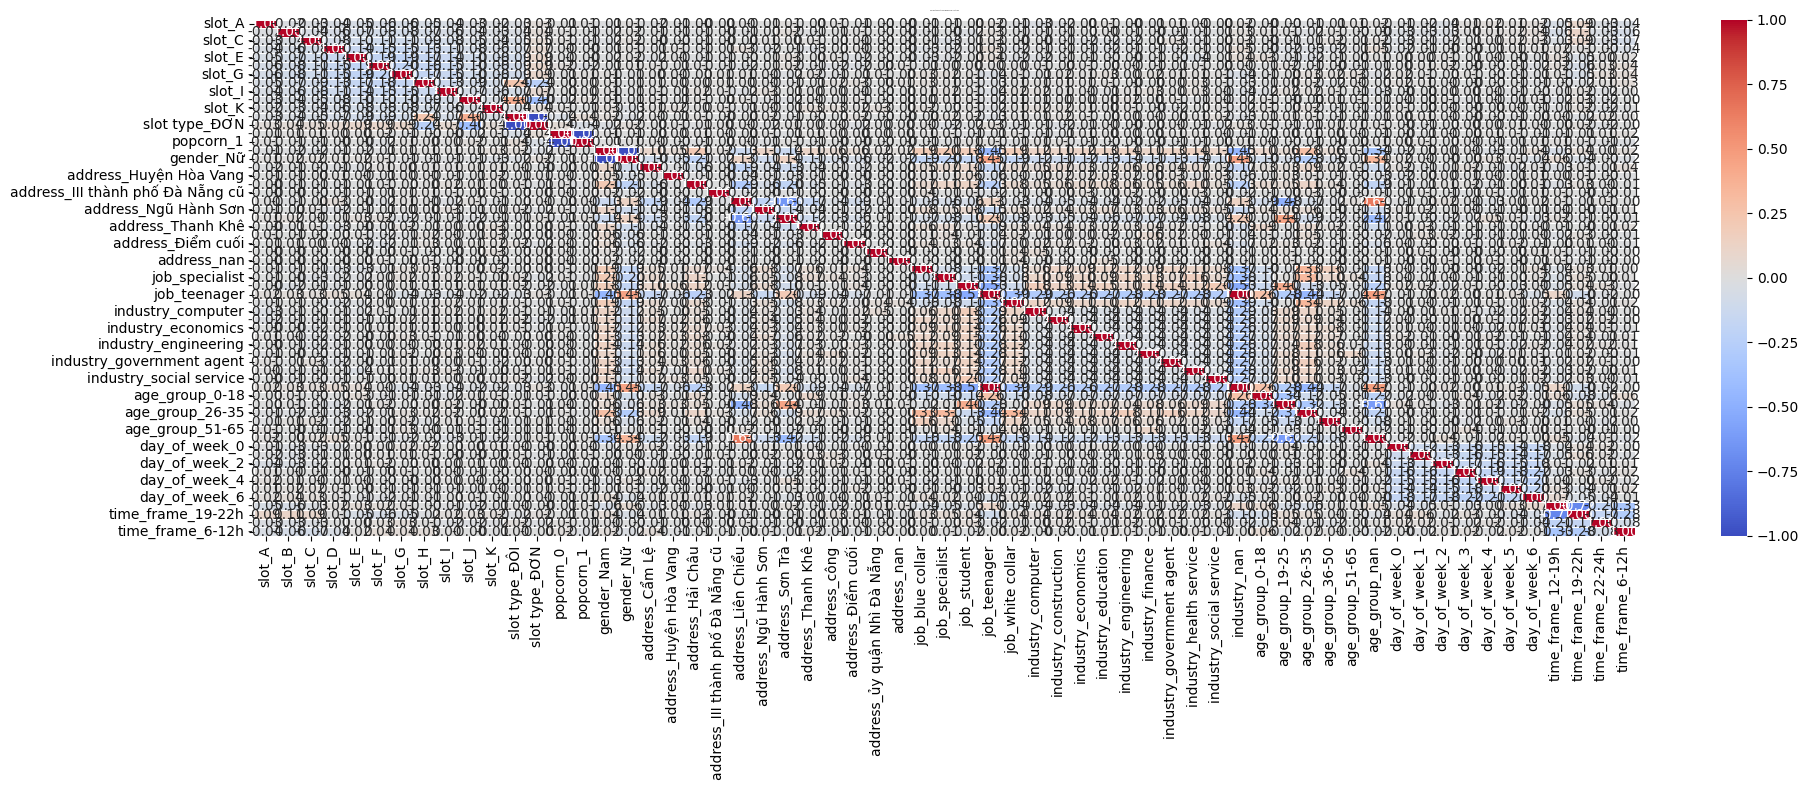

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1: Correlation analysis of numerical features
numerical_columns = encoded_df.select_dtypes(include=[np.number]).columns
correlation_matrix = encoded_df[numerical_columns].corr()

# Create a larger figure
plt.figure(figsize=(20, 8))

# Create a heatmap with correlation values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=1)
plt.tight_layout()
plt.show()


Các cột bị loại vì tương quan cao > 0.5: ['slot type_ĐƠN', 'popcorn_1', 'gender_Nữ', 'address_Sơn Trà', 'job_teenager', 'industry_nan', 'age_group_nan', 'time_frame_19-22h']


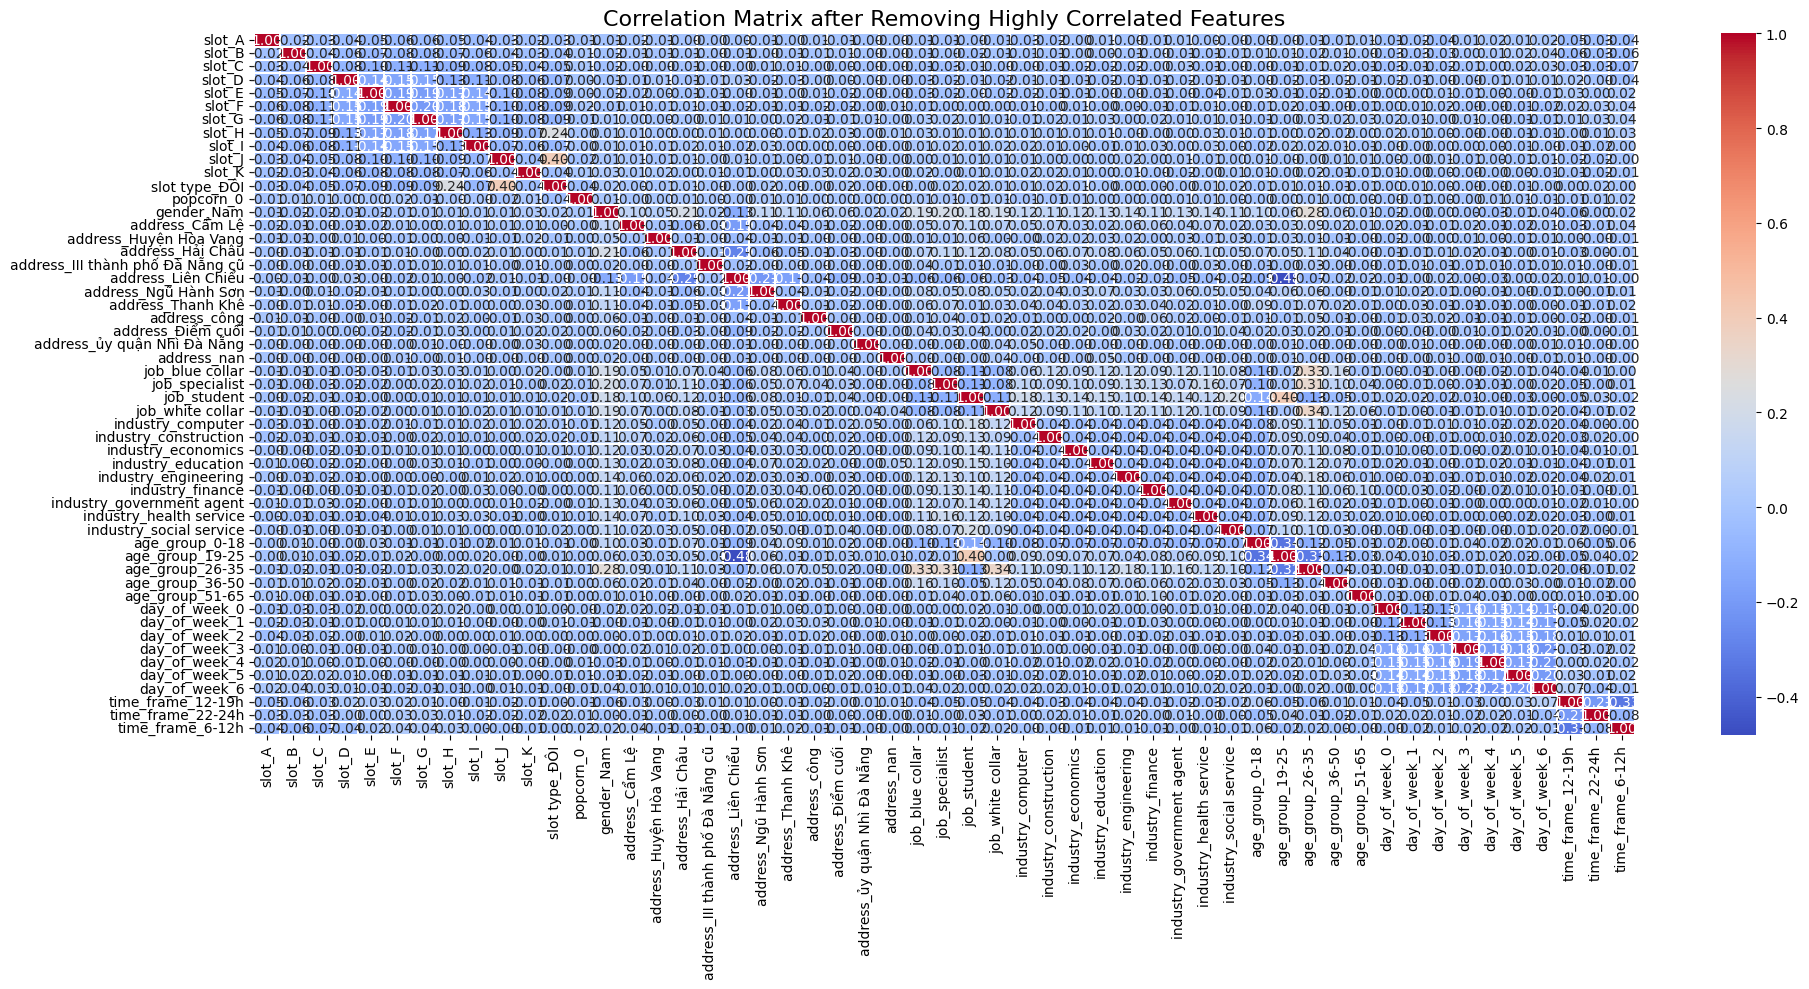

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bước 1: Lấy numerical columns ban đầu
numerical_columns = encoded_df.select_dtypes(include=[np.number]).columns

# Bước 2: Tính ma trận tương quan
correlation_matrix = encoded_df[numerical_columns].corr().abs()

# Bước 3: Lấy upper triangle
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Bước 4: Tìm các cột có tương quan cao tuyệt đối > 0.5
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.5)]

print(f"Các cột bị loại vì tương quan cao > 0.5: {to_drop}")

# Bước 5: Loại bỏ các cột này khỏi DataFrame
encoded_df = encoded_df.drop(columns=to_drop)

# ❗❗ Bước 6: Cập nhật lại numerical_columns sau khi drop
numerical_columns = encoded_df.select_dtypes(include=[np.number]).columns

# Bước 7: Vẽ lại heatmap với ma trận mới
correlation_matrix = encoded_df[numerical_columns].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.2)
plt.title('Correlation Matrix after Removing Highly Correlated Features', fontsize=16)
plt.tight_layout()
plt.show()


In [27]:
# ----- 4. GỘP DỮ LIỆU ĐẦU VÀO -----
# Loại bỏ day_of_week khỏi num_cols vì đã được one-hot encoded
num_cols = ['total', 'ticket price']
numerical_df = new_data[num_cols].reset_index(drop=True)
numerical_df

X = pd.concat([numerical_df, encoded_df.reset_index(drop=True)], axis=1)

# ----- 5. CHUYỂN `genres` SANG MULTI-LABEL -----
new_data['genres_list'] = new_data['genres'].str.split(',')
mlb = MultiLabelBinarizer()
Y = pd.DataFrame(mlb.fit_transform(new_data['genres_list']), columns=mlb.classes_)

# ----- 6. CHIA TRAIN/TEST -----
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.33,
                                                    random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

# Note: We now have both ticket-level and customer-level data prepared
# The customer-level approach using probabilities is likely to be more effective

((23767, 55), (11707, 55), (23767, 14), (11707, 14))

In [37]:
full_data = pd.concat([numerical_df, encoded_df.reset_index(drop=True)], axis=1)
full_data['customerid'] = new_data['customerid'].reset_index(drop=True)
full_data['genres'] = new_data['genres'].reset_index(drop=True)

# Tách genres thành list
full_data['genres_list'] = full_data['genres'].fillna('').apply(lambda x: x.split(','))

# One-hot encode genres thủ công
all_genres = sorted({genre for genres in full_data['genres_list'] for genre in genres if genre})
for genre in all_genres:
    full_data[f'genre_{genre}'] = full_data['genres_list'].apply(lambda x: int(genre in x))

# Loại bỏ cột gốc 'genres' và 'genres_list'
full_data = full_data.drop(columns=['genres', 'genres_list'])

# Tạo dict để tính trung bình theo customerid cho tất cả cột numerical, encoded, và genre one-hot
agg_dict = {
    **{col: 'mean' for col in numerical_df.columns},
    **{col: 'mean' for col in encoded_df.columns},
    **{col: 'mean' for col in full_data.columns if col.startswith('genre_')}
}

# Aggregate theo customerid
customer_profile = full_data.groupby('customerid').agg(agg_dict).reset_index()


customer_profile.head()

,customerid,total,ticket price,slot_A,slot_B,slot_C,slot_D,slot_E,slot_F,slot_G,...,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller
0,0000000014,90000.0,45000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0000000034,90000.0,45000.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,...,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5
2,0000000051,90000.0,45000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0000000081,90000.0,45000.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0000000098,90000.0,45000.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5


In [40]:
genre_columns = [col for col in customer_profile.columns if col.startswith('genre_')]
X_customer = customer_profile.drop(columns=['customerid'] + genre_columns)
Y_customer = customer_profile[genre_columns]

# Chia train/test cho customer-level data
X_train_customer, X_test_customer, Y_train_customer, Y_test_customer = train_test_split(
    X_customer, Y_customer, test_size=0.33, random_state=42
)

print(f"Customer-level training data shapes:")
print(f"X_train_customer: {X_train_customer.shape}")
print(f"X_test_customer: {X_test_customer.shape}")
print(f"Y_train_customer: {Y_train_customer.shape}")
print(f"Y_test_customer: {Y_test_customer.shape}")

Customer-level training data shapes:
X_train_customer: (3000, 55)
X_test_customer: (1479, 55)
Y_train_customer: (3000, 14)
Y_test_customer: (1479, 14)


In [41]:
# ----- LƯU CUSTOMER-LEVEL DATA -----
output_dir = '../training_data'
os.makedirs(output_dir, exist_ok=True)

# Lưu customer-level data
X_train_customer.to_csv(os.path.join(output_dir, 'X_train_customer.csv'), index=False)
X_test_customer.to_csv(os.path.join(output_dir, 'X_test_customer.csv'), index=False)
Y_train_customer.to_csv(os.path.join(output_dir, 'Y_train_customer.csv'), index=False)
Y_test_customer.to_csv(os.path.join(output_dir, 'Y_test_customer.csv'), index=False)

# Lưu customer profile để có thể sử dụng sau
customer_profile.to_csv(os.path.join(output_dir, 'customer_profile.csv'), index=False)

print("Đã lưu customer-level training data!")
print("Files created:")
print("- X_train_customer.csv")
print("- X_test_customer.csv") 
print("- Y_train_customer.csv")
print("- Y_test_customer.csv")
print("- customer_profile.csv")

Đã lưu customer-level training data!
Files created:
- X_train_customer.csv
- X_test_customer.csv
- Y_train_customer.csv
- Y_test_customer.csv
- customer_profile.csv
